In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

The dataset contains 32560 rows of data, 14 independent variables and 1 dependent variable (Income)

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no Null values in the dataset but Native_Country and Occupation columns have '?' which indicates empty values

In [6]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [8]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [9]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


There are 583 missing values for Native_Country and 1843 missing values for Occupation

In [10]:
# droping the bull values from both the columns
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [11]:
df.loc[df.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [12]:
df.loc[df.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [13]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are many non-numeric columns. Encoding to be done.

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [15]:
df1.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30161 non-null  int64
 1   Workclass       30161 non-null  int32
 2   Fnlwgt          30161 non-null  int64
 3   Education       30161 non-null  int32
 4   Education_num   30161 non-null  int64
 5   Marital_status  30161 non-null  int32
 6   Occupation      30161 non-null  int32
 7   Relationship    30161 non-null  int32
 8   Race            30161 non-null  int32
 9   Sex             30161 non-null  int32
 10  Capital_gain    30161 non-null  int64
 11  Capital_loss    30161 non-null  int64
 12  Hours_per_week  30161 non-null  int64
 13  Native_country  30161 non-null  int32
 14  Income          30161 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


### Target Variable Analysis

Target Variable is Income

In [17]:
df1['Income'].value_counts()

0    22653
1     7508
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

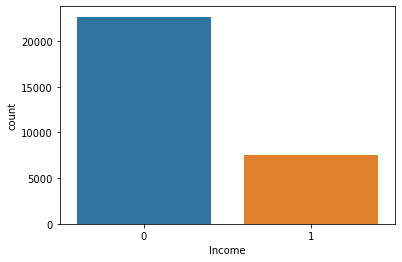

In [18]:
sns.countplot(x="Income",data=df1)

From above plot, data is imbalanced

### Resampling for solving class imbalance

In [19]:
df2=df1
df2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,4,2726,9,12,2,3,0,4,1,0,0,12,38,0
1,21,2,13187,11,8,0,5,1,4,1,0,0,39,38,0
2,36,2,14353,1,6,2,5,0,2,1,0,0,39,38,0
3,11,2,18119,9,12,2,9,5,2,0,0,0,39,4,0
4,20,2,16566,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,2,15470,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,2,7554,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,2,7376,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,2,12059,11,8,4,0,3,4,1,0,0,19,38,0


In [20]:
# class count
income_count_0, income_count_1 = df2['Income'].value_counts()
print('income_count_0, :',income_count_0, '\n income_count_1 : ', income_count_1)

income_count_0, : 22653 
 income_count_1 :  7508


In [21]:
# Separate class
income_0 = df2[df2['Income'] == 0]
income_1 = df2[df2['Income'] == 1]
# print the shape of the class
print('income 0:', income_0.shape)
print('income 1:', income_1.shape)

income 0: (22653, 15)
income 1: (7508, 15)


In [22]:
income_1_over = income_1.sample(income_count_0, replace=True)

df3 = pd.concat([income_1_over,income_0], axis=0)
print("total class of 1 and 0: \n",df3['Income'].value_counts())

total class of 1 and 0: 
 1    22653
0    22653
Name: Income, dtype: int64


In [25]:
df3.shape

(45306, 15)

<AxesSubplot:xlabel='Income', ylabel='count'>

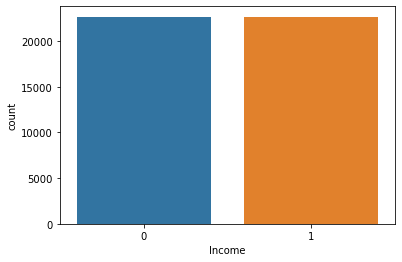

In [26]:
sns.countplot(x="Income",data=df3)

### EDA

### Univariate Analysis

### Plotting Distribution plot for checking data distribution and skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

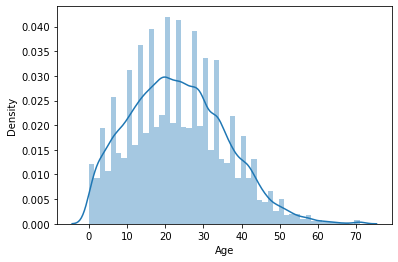

In [28]:
sns.distplot(df3['Age'])

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

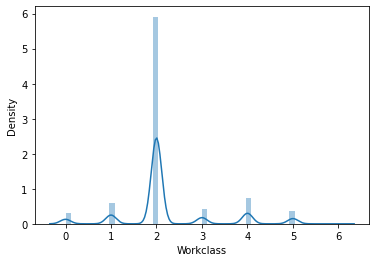

In [29]:
sns.distplot(df3['Workclass'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

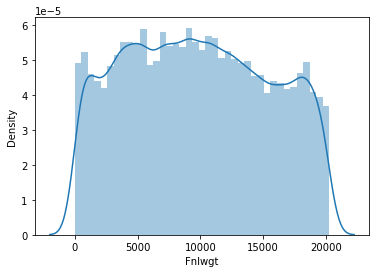

In [30]:
sns.distplot(df3['Fnlwgt'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

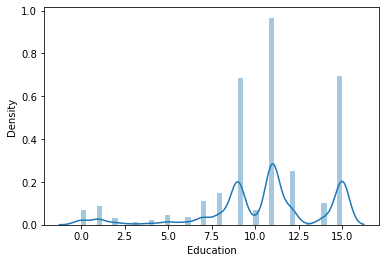

In [31]:
sns.distplot(df3['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

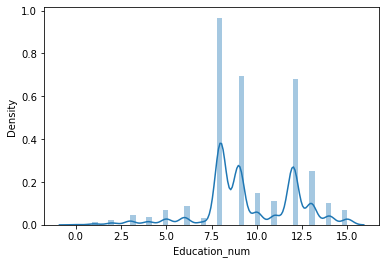

In [32]:
sns.distplot(df3['Education_num'])

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

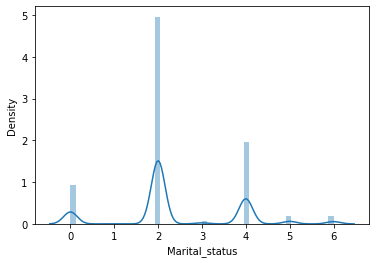

In [33]:
sns.distplot(df3['Marital_status'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

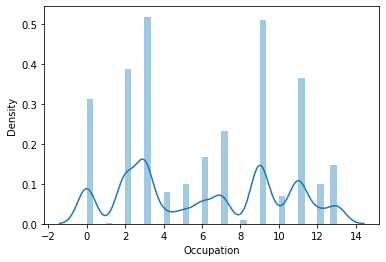

In [34]:
sns.distplot(df3['Occupation'])

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

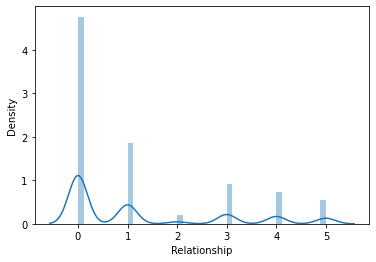

In [35]:
sns.distplot(df3['Relationship'])

<AxesSubplot:xlabel='Race', ylabel='Density'>

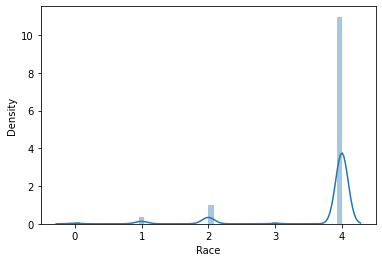

In [36]:
sns.distplot(df3['Race'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

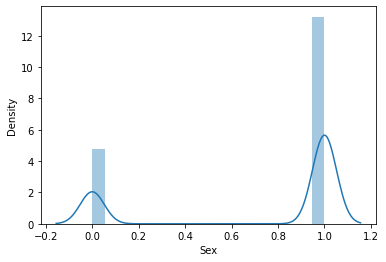

In [37]:
sns.distplot(df3['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

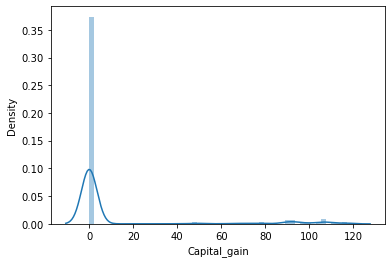

In [38]:
sns.distplot(df3['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

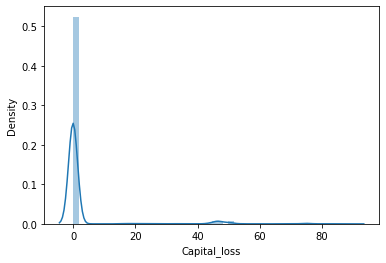

In [39]:
sns.distplot(df3['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

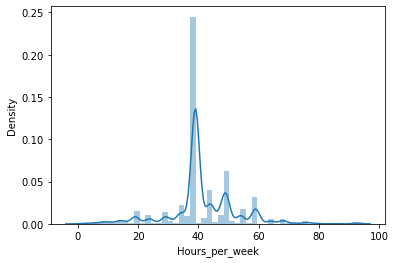

In [40]:
sns.distplot(df3['Hours_per_week'])

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

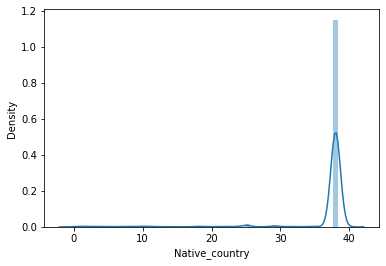

In [41]:
sns.distplot(df3['Native_country'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

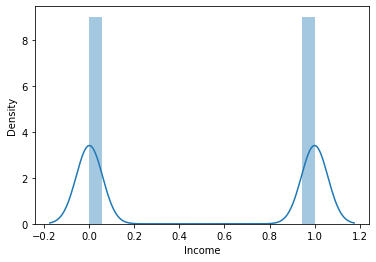

In [42]:
sns.distplot(df3['Income'])

All the variables have skewness which needs to be removed

### Plotting Boxplot for checking Outliers 

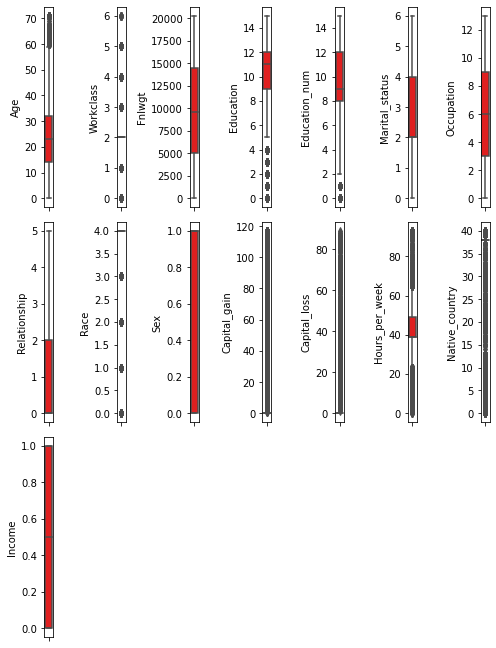

In [27]:
collist=df3.columns.values
ncol= 7
nrows= 7

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df3[collist[i]], color='red', orient='x')
    plt.tight_layout()

Workclass, Race, Education, Education_num, capital_gain, capital_loss,Hours_per_week, Native_country have outliers and need to be handled

### Removing Skewness

In [43]:
df3.skew()

Age               0.372488
Workclass         0.991668
Fnlwgt            0.078506
Education        -0.950855
Education_num    -0.297776
Marital_status    0.300665
Occupation        0.080565
Relationship      1.167547
Race             -2.732204
Sex              -1.062052
Capital_gain      2.523870
Capital_loss      4.064253
Hours_per_week    0.218737
Native_country   -4.362228
Income            0.000000
dtype: float64

### Removal of Outliers

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(df3))

df4=df3[(z<3).all(axis=1)]

In [45]:
df4.shape

(37526, 15)

In [46]:
df3.shape

(45306, 15)

In [47]:
Loss_percentage=(45306-37526)/45306*100
print(Loss_percentage)

17.172118483203107


Outlier removal is deleting 17% of data. So proceeding without removing outliers.

In [48]:
cor=df3.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.078109,-0.077751,0.018796,0.083776,-0.259424,0.004304,-0.238847,0.039636,0.114937,0.128506,0.073570,0.083736,0.008659,0.292733
Workclass,0.078109,1.000000,-0.033665,0.012222,0.046442,-0.023439,0.027179,-0.052729,0.040699,0.064167,0.023966,0.019122,0.053329,0.006324,0.019360
Fnlwgt,-0.077751,-0.033665,1.000000,-0.013655,-0.032134,0.025768,0.007369,-0.001027,-0.012026,0.022910,-0.001053,-0.007136,-0.020034,-0.056800,-0.011352
Education,0.018796,0.012222,-0.013655,1.000000,0.271994,-0.047637,-0.023318,-0.032122,0.019250,-0.003031,0.038732,0.007451,0.067906,0.061601,0.103744
Education_num,0.083776,0.046442,-0.032134,0.271994,1.000000,-0.083092,0.113258,-0.113531,0.035612,0.043599,0.174934,0.097826,0.171058,0.057658,0.381172
Marital_status,-0.259424,-0.023439,0.025768,-0.047637,-0.083092,1.000000,0.017422,0.171368,-0.064042,-0.140333,-0.067356,-0.038551,-0.183367,-0.031464,-0.247888
Occupation,0.004304,0.027179,0.007369,-0.023318,0.113258,0.017422,1.000000,-0.058965,0.009064,0.062136,0.026679,0.013965,0.026957,-0.008947,0.063378
Relationship,-0.238847,-0.052729,-0.001027,-0.032122,-0.113531,0.171368,-0.058965,1.000000,-0.113675,-0.661236,-0.078104,-0.061021,-0.268313,-0.019488,-0.290118
Race,0.039636,0.040699,-0.012026,0.019250,0.035612,-0.064042,0.009064,-0.113675,1.000000,0.093348,0.024084,0.025069,0.059586,0.150871,0.090323
Sex,0.114937,0.064167,0.022910,-0.003031,0.043599,-0.140333,0.062136,-0.661236,0.093348,1.000000,0.069913,0.051037,0.249414,0.007760,0.265454


<AxesSubplot:>

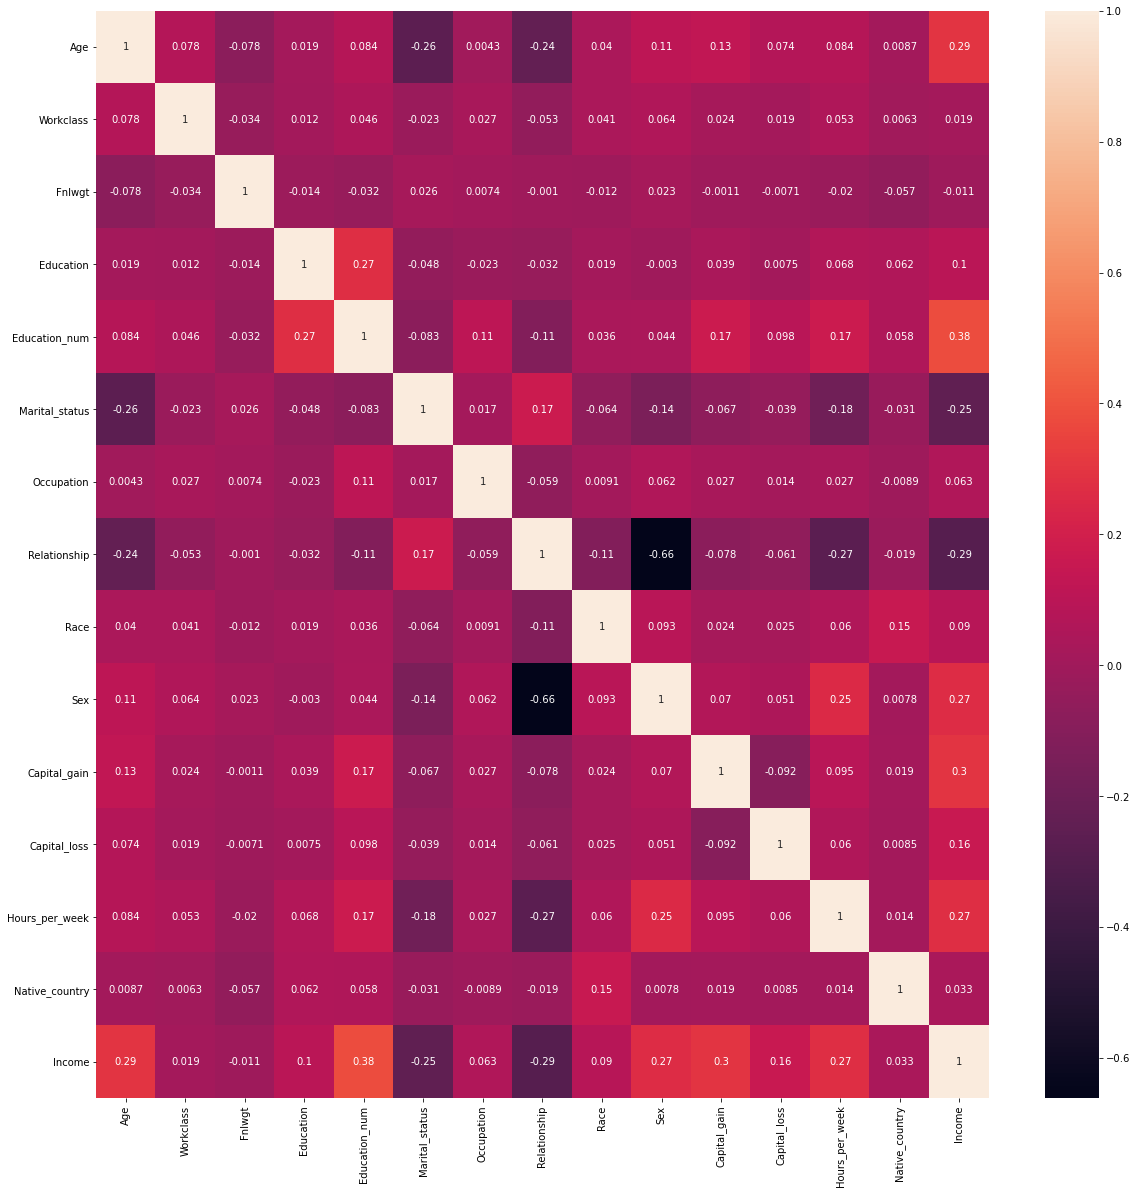

In [49]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Checking for multi collinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif_data = pd.DataFrame()
vif_data["feature"] = df3.columns

In [54]:
vif_data["VIF"] = [variance_inflation_factor(df3.values, i)
                            for i in range(len(df3.columns))]
print(vif_data)

           feature        VIF
0              Age   4.922838
1        Workclass   5.994616
2           Fnlwgt   3.856378
3        Education  10.448734
4    Education_num  18.077030
5   Marital_status   4.422407
6       Occupation   3.333644
7     Relationship   2.591270
8             Race  20.782485
9              Sex   6.451947
10    Capital_gain   1.279483
11    Capital_loss   1.122197
12  Hours_per_week  14.368240
13  Native_country  29.474168
14          Income   3.030913


### Splitting data into independent(x) and dependent(y) variables

In [59]:
x = df3.drop(['Income'],axis=1)
y = df3['Income']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [61]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.915759270158917 On random_state 1943


In [62]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.30, random_state=1943)

### Scaling the data using MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

In [64]:
print(new_xtrain)

[[0.30985915 0.33333333 0.12215587 ... 0.52272727 0.52688172 0.95      ]
 [0.47887324 0.33333333 0.05720349 ... 0.         0.52688172 0.95      ]
 [0.52112676 0.33333333 0.87932481 ... 0.         0.41935484 0.95      ]
 ...
 [0.47887324 0.16666667 0.80267509 ... 0.         0.41935484 0.95      ]
 [0.1971831  0.33333333 0.48013425 ... 0.         0.41935484 0.95      ]
 [0.15492958 0.33333333 0.64759884 ... 0.         0.6344086  0.95      ]]


In [65]:
print(new_xtest)

[[0.46478873 0.33333333 0.33004294 ... 0.         0.58064516 0.95      ]
 [0.26760563 0.83333333 0.504368   ... 0.         0.41935484 0.95      ]
 [0.33802817 0.33333333 0.33241202 ... 0.         0.37634409 0.95      ]
 ...
 [0.36619718 0.33333333 0.71526578 ... 0.         0.41935484 0.95      ]
 [0.22535211 0.33333333 0.00434332 ... 0.         0.31182796 0.95      ]
 [0.12676056 0.33333333 0.67311584 ... 0.         0.58064516 0.8       ]]


### Model Creation

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred_dtc=DTC.predict(new_xtest)
acc=classification_report(y_test,pred_dtc)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6810
           1       0.87      0.97      0.92      6782

    accuracy                           0.92     13592
   macro avg       0.92      0.92      0.92     13592
weighted avg       0.92      0.92      0.92     13592



In [80]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred_rfc=RFC.predict(new_xtest)
acc=classification_report(y_test,pred_rfc)
print(acc)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6810
           1       0.89      0.97      0.93      6782

    accuracy                           0.93     13592
   macro avg       0.93      0.93      0.93     13592
weighted avg       0.93      0.93      0.93     13592



In [81]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred_svc=SV.predict(new_xtest)
acc=classification_report(y_test,pred_svc)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      6810
           1       0.78      0.88      0.83      6782

    accuracy                           0.82     13592
   macro avg       0.82      0.82      0.82     13592
weighted avg       0.82      0.82      0.82     13592



In [82]:
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
pred_gbc = GBC.predict(new_xtest)
gbc=classification_report(y_test,pred_gbc)
print(gbc)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      6810
           1       0.81      0.86      0.84      6782

    accuracy                           0.83     13592
   macro avg       0.83      0.83      0.83     13592
weighted avg       0.83      0.83      0.83     13592



### Finding Cross Validation Score

In [71]:
from sklearn.model_selection import cross_val_score

In [83]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.9148458067297423


In [84]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9311350073367952


In [78]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.5316292688577732


In [77]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.8359379527039458


### Difference between model accuracy and cv score

DTC: 92-91=1

RFC: 93-93=0

SV: 82-53=29

GBC: 83-83.5=-0.5
    
Random Forest classifier is showing no difference and has highest accuracy. So considering the same for final model

### Hyper Parameter Tuning

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [87]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [88]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E75E737550>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E75E753760>})

In [89]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2}
Best score is 0.9122412425690941


### Predictions

In [95]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1]
[0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1]


### Final Model Creation

In [90]:
Final_mod = RandomForestClassifier(criterion= 'gini', max_depth = None, max_features = 4, min_samples_leaf = 2)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

90.33990582695704


In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)

AUC: 0.927


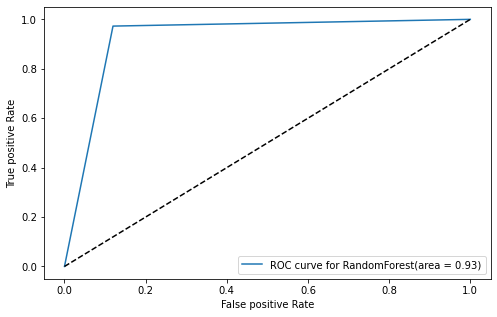

In [92]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

### Confusion Matrix

Text(91.68, 0.5, 'Predicted Income')

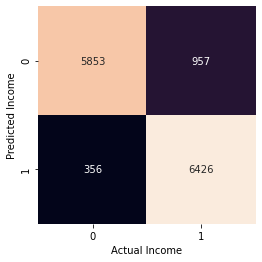

In [93]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')

### Saving the Final Model

In [94]:
import joblib
joblib.dump(Final_mod,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']